In [1]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
import os

roc_path = '../data/rocs_weka'

os.listdir(roc_path)

translated_algs = {
    'J48':'C4.5'
}

c45dfs = []
partdfs = []
adadfs = []
mlpdfs = []
svmdfs = []
rfdfs = []

for f in os.listdir(roc_path):
    train_set = f.split('_')[2]
    test_set = f.split('_')[4]
    alg = f.split('_')[5].split('.')[0]
    alg = translated_algs[alg] if alg in translated_algs.keys() else alg
    raw_data = loadarff(os.path.join(roc_path,f))
    df_data = pd.DataFrame(raw_data[0])
    for col in df_data:
        df_data[col] = pd.to_numeric(df_data[col])
    if alg == 'C4.5':
        c45dfs.append((train_set,test_set,df_data))
    elif alg == 'PART':
        partdfs.append((train_set,test_set,df_data))
    elif alg == 'ADA':
        adadfs.append((train_set,test_set,df_data))
    elif alg == 'MLP':
        mlpdfs.append((train_set,test_set,df_data))
    elif alg == 'SVM':
        svmdfs.append((train_set,test_set,df_data))
    elif alg == 'RandomForest':
        rfdfs.append((train_set,test_set,df_data))
    print(f, alg,'train',train_set,'test',test_set,'shape:', df_data.shape)
    

roc_train_up_test_up_SVM.arff SVM train up test up shape: (3, 14)
roc_train_up_test_up_RandomForest.arff RandomForest train up test up shape: (102, 14)
roc_train_up_test_up_PART.arff PART train up test up shape: (232, 14)
roc_train_up_test_up_MLP.arff MLP train up test up shape: (11897, 14)
roc_train_up_test_up_J48.arff C4.5 train up test up shape: (187, 14)
roc_train_up_test_up_ADA.arff ADA train up test up shape: (239, 14)
roc_train_up_test_sim_SVM.arff SVM train up test sim shape: (3, 14)
roc_train_up_test_sim_RandomForest.arff RandomForest train up test sim shape: (99, 14)
roc_train_up_test_sim_PART.arff PART train up test sim shape: (34, 14)
roc_train_up_test_sim_MLP.arff MLP train up test sim shape: (3055, 14)
roc_train_up_test_sim_J48.arff C4.5 train up test sim shape: (28, 14)
roc_train_up_test_sim_ADA.arff ADA train up test sim shape: (31, 14)
roc_train_uma_test_uma_SVM.arff SVM train uma test uma shape: (3, 14)
roc_train_uma_test_uma_RandomForest.arff RandomForest train uma t

In [3]:
x_axis = 'False Positive Rate'
y_axis = 'True Positive Rate'

x_axis_label = 'False Positive Rate'
y_axis_label = 'True Positive Rate'

colors = [
    "red", "blue", "green", "orange"
]

In [4]:
all_dfs = [
    c45dfs,
    partdfs,
    mlpdfs,
    adadfs,    
    svmdfs,
    rfdfs,
]

labels = [
    'Train UMA Test Simulared',
    'Train UMA Test UMA',
    'Train UP Test Simulated',
    'Train UP Test UP'
]

titles = [
    'C4.5',
    'PART',
    'MLP',
    'AdaBoost + Decision Stump',
    'SVM',
    'Random Forest'
]

In [5]:
all_dfs[0]

[('up',
  'up',
       Instance_number  True Positives  False Negatives  False Positives  \
  0                0.0          5948.0              0.0           5948.0   
  1                1.0          5824.0            124.0           4813.0   
  2                2.0          5823.0            125.0           4545.0   
  3                3.0          5822.0            126.0           4264.0   
  4                4.0          5819.0            129.0           3975.0   
  5                5.0          5819.0            129.0           3729.0   
  6                6.0          5819.0            129.0           3472.0   
  7                7.0          5819.0            129.0           3214.0   
  8                8.0          5819.0            129.0           2946.0   
  9                9.0          5819.0            129.0           2669.0   
  10              10.0          5818.0            130.0           2385.0   
  11              11.0          5818.0            130.0           2111.0

In [6]:
maxlen = 0
for train_set, test_set, df in c45dfs:
    print(train_set, test_set, len(df))
    if len(df) > maxlen:
        maxlen = len(df)
    print(df.index)

up up 187
RangeIndex(start=0, stop=187, step=1)
up sim 28
RangeIndex(start=0, stop=28, step=1)
uma uma 237
RangeIndex(start=0, stop=237, step=1)
uma sim 43
RangeIndex(start=0, stop=43, step=1)


In [7]:
for i in range(len(all_dfs)):
    for train_set, test_set, df in all_dfs[i]:
        print(train_set, test_set, titles[i])

up up C4.5
up sim C4.5
uma uma C4.5
uma sim C4.5
up up PART
up sim PART
uma uma PART
uma sim PART
up up MLP
up sim MLP
uma uma MLP
uma sim MLP
up up AdaBoost + Decision Stump
up sim AdaBoost + Decision Stump
uma uma AdaBoost + Decision Stump
uma sim AdaBoost + Decision Stump
up up SVM
up sim SVM
uma uma SVM
uma sim SVM
up up Random Forest
up sim Random Forest
uma uma Random Forest
uma sim Random Forest


0
up up 187
up sim 28
uma uma 237
uma sim 43
3
up up 239
up sim 31
uma uma 162
uma sim 16
1
up up 232
up sim 34
uma uma 194
uma sim 27
4
up up 3
up sim 3
uma uma 3
uma sim 3
2
up up 11897
up sim 3055
uma uma 10487
uma sim 3055
5
up up 102
up sim 99
uma uma 102
uma sim 95


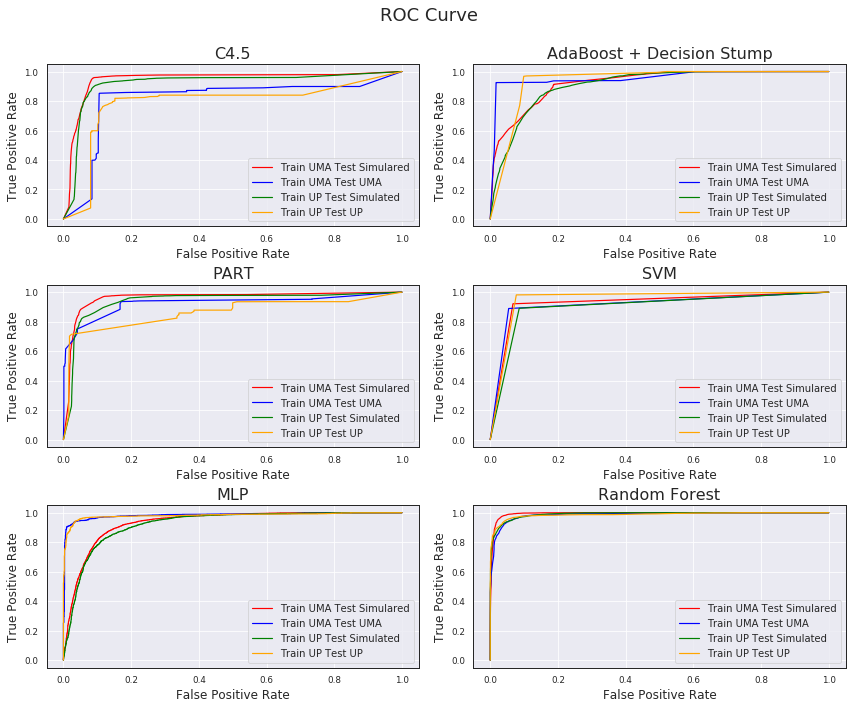

In [8]:
sns.set_context("paper")
sns.set_style("darkgrid",{'axes.facecolor': '#EAEAF2', 'axes.edgecolor': '.15', 'grid.linewidth':'10'})

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for row_index in range(3):
    for column_index in range(2):
        curr_ind = row_index + column_index * 3
        print(curr_ind)
        ax = axes[row_index][column_index]
        for i,(train_set,test_set,df) in enumerate(all_dfs[curr_ind]):
            print(train_set, test_set, len(df))
            ax.plot(df[x_axis],df[y_axis], color = colors[i])            
        ax.set_xlabel(x_axis_label, fontsize = 12)
        ax.set_ylabel(y_axis_label, fontsize = 12)
        ax.legend(labels, fontsize=10)
        ax.set_title(titles[curr_ind], fontsize = 16)
        ax.grid(True)
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('ROC Curve', fontsize = 18)
plt.savefig('../tex/figs/roc_curve.png', bbox_inches = "tight")